# **Notebook 5: Model Training and Evaluation**

## Objectives

The primary objective of this notebook is to develop, evaluate, and select the best-performing machine learning model(s) to predict house sale prices in Ames, Iowa. This involves training models on the processed datasets, fine-uning their hyperparameters, and assessing their performance based on defined metrics.

## Inputs

* **Training Dataset with Target (`train_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model training.
* **Testing Dataset with Target (`test_with_target.csv`):** Includes processed features and the log-transformed target variable (`LogSalePrice`) for model evaluation.
* **Key Feature Correlations (`key_drivers_correlation.csv`):** Identified the most impactful features influencing the target variable.

## Outputs

* **Trained Models:** Serialized versions of trained models saved for deployment.
* **Evaluation Metrics:** Metrics like R2, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for model comparison.
* **Feature Importances:** Insights into which features contributed most to model predictions.
* **Model Performance Report:** Comprehensive report summarizing model performance and insights.

## Additional Comments

* The notebook is structured to ensure modularity, allowing for easy updates or experimentation with different models or preprocessing steps.
* Exploratory insights gained in the previous notebook will inform feature selection and preprocessing strategies.
* Advanced modeling techniques, such as hyperparameter optimization and ensemble learning, will be considered for improving accuracy.


---

## Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Predictive-Analytics-PP5'

---

## Data Preparation

### Load Processed Data

**Objective:** Load the preprocessed datasets required for model training and evaluation.

**Inputs:**
- `train_with_target.csv` and `test_with_target.csv` files containing the processed training and testing datasets with the target variable included.

In [8]:
import pandas as pd

# Define file paths
train_data_path = "outputs/datasets/processed/with_target/train_with_target.csv"
test_data_path = "outputs/datasets/processed/with_target/test_with_target.csv"

# Load the datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

# Display dataset shapes
print("Training Dataset Info:")
print(train_data.info())
print("\nTesting Dataset Info:")
print(test_data.info())

# Preview the datasets
print("\nPreview of Training Dataset:")
display(train_data.head())

print("\nPreview of Testing Dataset:")
display(test_data.head())

# Check for missing values
print("\nChecking for missing values in training data:")
print(train_data.isnull().sum())

print("\nChecking for missing values in testing data:")
print(test_data.isnull().sum())

Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__OverallCond 

,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageYrBlt,num__OverallCond,num__OverallQual,num__Age,num__LivingLotRatio,num__FinishedBsmtRatio,num__OverallScore,cat__HasPorch_1,LogSalePrice,SalePriceQuartile
0,0.144140,-0.161873,-1.096169,-0.827815,0.865283,-0.292584,0.526873,0.455469,1.346063,-0.288836,...,0.192392,0.372217,-0.820445,-0.455469,-0.116096,0.887733,-0.437833,0.0,11.884496,Q2
1,-0.392921,-0.304082,0.617419,-0.827815,-1.416429,0.250597,-1.040595,-0.718609,-0.439214,-0.288836,...,0.272225,1.268609,-0.088934,0.718609,0.455054,-1.415946,0.858190,1.0,12.089544,Q3
2,0.006402,-0.071879,-1.096169,-0.827815,-1.416429,-1.816242,-1.052445,1.988293,1.683818,0.645680,...,-4.147410,1.268609,-0.820445,-1.988293,-1.409123,-1.415946,0.102176,0.0,11.350418,Q1 (Low)
3,-0.340186,-0.477855,-1.096169,1.276291,0.704206,0.609851,-0.394093,1.107734,1.683818,-0.288836,...,0.152476,1.268609,-0.820445,-1.107734,0.918129,0.640194,0.102176,0.0,12.072547,Q3
4,-0.911425,-1.225280,-1.096169,-0.827815,0.384534,0.474436,-0.252776,1.531707,1.683818,-0.288836,...,0.119212,0.372217,-0.820445,-1.531707,1.593562,0.340697,-0.437833,0.0,11.751950,Q1 (Low)



Preview of Testing Dataset:


,num__LotFrontage,num__LotArea,num__OpenPorchSF,num__MasVnrArea,num__BsmtFinSF1,num__GrLivArea,num__1stFlrSF,num__YearBuilt,num__YearRemodAdd,num__BedroomAbvGr,...,num__GarageArea,num__GarageYrBlt,num__OverallCond,num__OverallQual,Age,LivingLotRatio,FinishedBsmtRatio,OverallScore,HasPorch,LogSalePrice
0,0.144140,-0.158460,-1.096169,-0.827815,0.755219,-0.922794,-0.126358,0.227176,-0.873470,-2.157869,...,-1.006014,0.205698,2.165000,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038,11.947949
1,1.204764,0.612540,0.517257,1.413568,0.902910,1.808434,0.944129,-0.783836,-0.487465,-2.157869,...,1.117159,0.274443,-0.524174,1.374088,1986.358491,0.798551,0.515713,35.037736,0.566038,12.691580
2,-0.556568,-0.029579,-1.096169,-0.827815,-1.416429,-1.038836,-0.246639,1.401254,1.683818,-1.223352,...,-0.551048,0.125865,0.372217,-0.820445,1986.358491,0.798551,0.515713,35.037736,0.566038,11.652687
3,-0.911425,-1.225280,0.389147,-0.827815,0.585846,0.425488,-0.321073,0.748988,1.683818,-2.157869,...,-0.266695,0.176869,1.268609,-0.088934,1986.358491,0.798551,0.515713,35.037736,0.566038,11.976659
4,0.900684,0.717202,-1.096169,0.793095,0.899659,0.343995,1.186707,-1.207808,-1.114724,-1.223352,...,2.065003,0.305489,-0.524174,2.105599,1986.358491,0.798551,0.515713,35.037736,0.566038,12.661914



Checking for missing values in training data:
num__LotFrontage          0
num__LotArea              0
num__OpenPorchSF          0
num__MasVnrArea           0
num__BsmtFinSF1           0
num__GrLivArea            0
num__1stFlrSF             0
num__YearBuilt            0
num__YearRemodAdd         0
num__BedroomAbvGr         0
num__2ndFlrSF             0
num__BsmtUnfSF            0
num__GarageArea           0
num__GarageYrBlt          0
num__OverallCond          0
num__OverallQual          0
num__Age                  0
num__LivingLotRatio       0
num__FinishedBsmtRatio    0
num__OverallScore         0
cat__HasPorch_1           0
LogSalePrice              0
SalePriceQuartile         0
dtype: int64

Checking for missing values in testing data:
num__LotFrontage     0
num__LotArea         0
num__OpenPorchSF     0
num__MasVnrArea      0
num__BsmtFinSF1      0
num__GrLivArea       0
num__1stFlrSF        0
num__YearBuilt       0
num__YearRemodAdd    0
num__BedroomAbvGr    0
num__2ndFlrSF       

### Feature and Target Separation

**Objectives:**
To separate the features (`x`) and the target variable (`y`) for both training and testing datasets. This step is essential to prepare the data for model training and evaluation.

**Steps:**
1. Define `x_train`, `x_test`, `y_train`, and `y_test` to clearly separate features and target variables.
2. Ensure consistency in column selection across training and testing datasets.
3. Confirm that the target variable (`LogSalePrice`) is correctly assigned to `y_train` and `y_test`.

**Expected Outputs:**
- `x_train` and `x_test` contain only feature columns, excluding the target variable (`LogSalePrice`).
- `y_train` and `y_test` contain only the target variable.

In [10]:
# Separate features and target variable for training data
y_train = train_data["LogSalePrice"]
x_train = train_data.drop(columns=["LogSalePrice", "SalePriceQuartile"])

# Separate features and target variable for testing data
y_test = test_data["LogSalePrice"]
x_test = test_data.drop(columns=["LogSalePrice"])

# Display structure of separated datasets
print("Training Features Dataset Info:")
print(x_train.info())
print("\nTraining Target Dataset Info:")
print(y_train.describe())

print("\nTesting Features Dataset Info:")
print(x_test.info())
print("\nTesting Target Dataset Info:")
print(y_test.describe())

# Preview the separated datasets
print("\nPreview of Training Features Dataset:")
print(x_train.head())

print("\nPreview of Testing Features Dataset:")
print(x_test.head())

Training Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num__LotFrontage        1168 non-null   float64
 1   num__LotArea            1168 non-null   float64
 2   num__OpenPorchSF        1168 non-null   float64
 3   num__MasVnrArea         1168 non-null   float64
 4   num__BsmtFinSF1         1168 non-null   float64
 5   num__GrLivArea          1168 non-null   float64
 6   num__1stFlrSF           1168 non-null   float64
 7   num__YearBuilt          1168 non-null   float64
 8   num__YearRemodAdd       1168 non-null   float64
 9   num__BedroomAbvGr       1168 non-null   float64
 10  num__2ndFlrSF           1168 non-null   float64
 11  num__BsmtUnfSF          1168 non-null   float64
 12  num__GarageArea         1168 non-null   float64
 13  num__GarageYrBlt        1168 non-null   float64
 14  num__Ove

---

## Model Selection

### Overview of Models

In this section, we will:
1. Provide an overview of the machine learning models to be evaluated.
2. Justify the selection of each model based on its suitability for predicting house prices.
3. Define the evaluation metrics to compare the models effectively.

**Models Considered:**
- **Linear Regression:** A baseline model to understand linear relationships between features and target.
- **Ridge Regression:** Linear regression with regularization to handle multicollinearity.
- **Lasso Regression:** Regularized regression that performs feature selection.
- **Decision Tree Regressor:** A non-linear model that can capture complex patterns.
- **Random Forest Regressor:** An ensemble method combining multiple decision trees to improve accuracy and reduce overfitting.
- **Gradient Boosting Regressor (e.g., XGBoost):** An advanced ensemble method that builds trees sequentially to optimize performance.
- **Support Vector Refression (SVR):** A robust model for capturing non-linear relationships.

**Evaluation Metrics:**
1. **R2 (Coefficient of Determination):** Measures how well the model explains variance in the data.
2. **RMSE (Root Mean Squared Error):** Penalizes large prediction errors, providing insight into the model's accuracy.
3. **MAE (Mean Absolute Error):** Measures average prediction error, focusing on interpretability.

By evaluating these models using the defined metrics, we aim to identify the best-performing model for predicting house prices.

In [11]:
# List of models to be evaluated
models = {
    "Linear Regression": "A simple baseline model to capture linear relationships.",
    "Ridge Regression": "Handles multicollinearity and improves generalization using L2 regularization.",
    "Lasso Regression": "Adds feature selection capabilities with L1 regularization.",
    "Decision Tree Regressor": "Captures non-linear relationships and is easy to interpret.",
    "Random Forest Regressor": "Reduces overfitting through ensemble learning.",
    "Gradient Boosting Regressor": "Sequentially optimizes predictions for improved accuracy.",
    "Support Vector Regression": "Effective for non-linear relationships with robust regularization."
}

# Print a summary of models
print("Models Overview:")
for model_name, description in models.items():
    print(f"{model_name}: {description}")

# Evaluate metrics
metrics = ["R2 (Coefficient of Determination)", "RMSE (Root Mean Squared Error)", "MAE (Mean Absolute Error)"]

print("\nEvaluation Metrics:")
for metric in metrics:
    print(f"- {metric}")

Models Overview:
Linear Regression: A simple baseline model to capture linear relationships.
Ridge Regression: Handles multicollinearity and improves generalization using L2 regularization.
Lasso Regression: Adds feature selection capabilities with L1 regularization.
Decision Tree Regressor: Captures non-linear relationships and is easy to interpret.
Random Forest Regressor: Reduces overfitting through ensemble learning.
Gradient Boosting Regressor: Sequentially optimizes predictions for improved accuracy.
Support Vector Regression: Effective for non-linear relationships with robust regularization.

Evaluation Metrics:
- R2 (Coefficient of Determination)
- RMSE (Root Mean Squared Error)
- MAE (Mean Absolute Error)


### Baseline Model

**Objective:**
- Establish a baseline performance using a simple regression model to benchmark subsequent models.
- Evaluate the performance using R1, Mean Absolute Error (MAE), and Mean Squared Error (MSE).

**Steps:**
- Select a simple baseline model (e.g., Mean Predictor).
- Fit the model on the training dataset.
- Predict the target values for both training and testing datasets.
- Calculate performance metrics for the baseline model.
- Interpret the results and their implications for subsequent models.

Baseline Model Metrics:
    Dataset       R2       MAE       MSE
0  Training  0.00000  0.303367  0.152442
1   Testing -0.00584  0.337137  0.187703


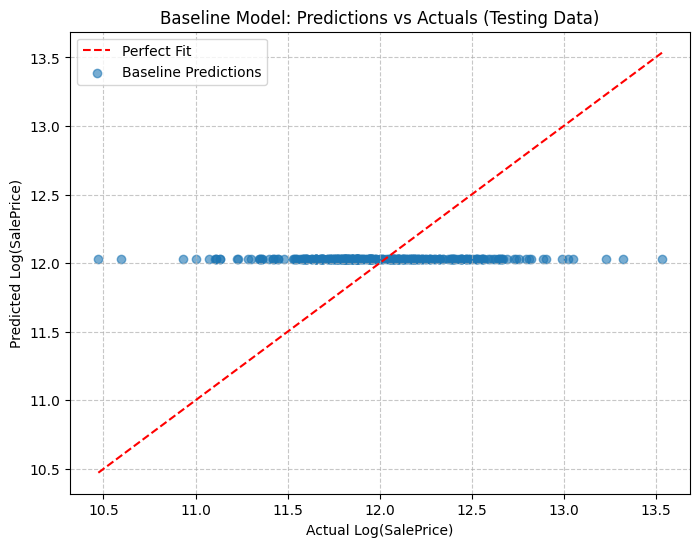

In [12]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the baseline model: Mean Predictor
y_baseline_train = [y_train.mean()] * len(y_train)
y_baseline_test = [y_train.mean()] * len(y_test)

# Calculate performance metrics
baseline_metrics = {
    "Dataset": ["Training", "Testing"],
    "R2": [
        r2_score(y_train, y_baseline_train),
        r2_score(y_test, y_baseline_test)
    ],
    "MAE": [
        mean_absolute_error(y_train, y_baseline_train),
        mean_absolute_error(y_test, y_baseline_test)
    ],
    "MSE": [
        mean_squared_error(y_train, y_baseline_train),
        mean_squared_error(y_test, y_baseline_test)
    ]
}

# Convert to DataFrame for display
baseline_metrics_df = pd.DataFrame(baseline_metrics)

# Display metrics
print("Baseline Model Metrics:")
print(baseline_metrics_df)

# Plot baseline predictions vs true values (Testing)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_baseline_test, alpha=0.6, label="Baseline Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label="Perfect Fit")
plt.title("Baseline Model: Predictions vs Actuals (Testing Data)")
plt.xlabel("Actual Log(SalePrice)")
plt.ylabel("Predicted Log(SalePrice)")
plt.legend()
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

#### Baseline Model Performance

**Overview**

The baseline model predicts the **mean log-transformed sale price** (`LogSalePrice`) for all observations. This simplistic approach serves as a benchmark to evaluate the performance of more sophisticated models.

**Results**
| **Dataset**   | **R2**        | **MAE**       | **MSE**       |
|---------------|---------------|---------------|---------------|
| Training      | 0.00000       | 0.303367      | 0.152442      |
| Testing       | -0.00584      | 0.337137      | 0.187703      |

- **R2 (Coefficient of Determination):**
  - Training R2: 0.0, as expected, since the model predicts a constant value and does not explain any variability in the target.
  - Testing R2: Slightly negative (-0.00584), indicating that the baseline model performs marginally worse than a random constant predictor.
- **MAE (Mean Absolute Error):**
  - Represents the average deviation of predictions from avtual values. This serves as a advanced models will suggest better accuracy.

**Visualization Insights**
- The scatterplot illustrates the baseline predictions as a horizontal line (y=12), representing the mean `LogSalePrice`.
- Variability in the actual y values is evident along the X-axis.
- Significant deviations from the diagonal line highlight the model's inability to capture the relationship between features and `LogSalePrice`.

**Limitations of the Baseline Model**
- Does not account for variability in features or capture any relationships within the data.
- Primarily used to set a benchmark for comparing the performance of more sophisticated models.

**Next Steps**
1. Develop advanced models that can capture relationships between features and `LogSalePrice`.
2. Evaluate these models against the baseline metrics to ensure meaningful improvement.

---

## Model Training and Hyperparameter Tuning

### Train Multiple Models

### Hyperparameter Tuning

---

## Model Evaluation

### Evaluation Metrics

### Cross-Validation Results

### Test Set Results

### Residual Analysis

### Error Analysis

---

## Feature Importance and Insights

### Feature Importance

### Key Takeaways

---

## Exploratory Model Analysis

### Experimentation with Additional Models

### Comparative Analysis

### Model Interpretability

---

## Conclusion and Recommendations

---

## Save Outputs

---

## Future Improvements